# Riggs_Comp6_Project

# Cart Pole

**I start by installing OpenAI's basline3 repository so that I can use their PPO model for cart pole**

In [ ]:
!pip install "stable-baselines3"

**I add all the necessary dependencies for the project and create a cart pool environment**

In [ ]:
import time
import random
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
import gym
import matplotlib.pyplot as plt
import gymnasium

In [ ]:
env = make_vec_env("CartPole-v1", n_envs=4)


**I train the model by using the model.learn() attribute then run it.**

In [ ]:


model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=25000)
model.save("ppo_cartpole")

obs = env.reset()

for i in range(3):
    env.render("ansi")

Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.6     |
|    ep_rew_mean     | 22.6     |
| time/              |          |
|    fps             | 1813     |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 8192     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30.2        |
|    ep_rew_mean          | 30.2        |
| time/                   |             |
|    fps                  | 630         |
|    iterations           | 2           |
|    time_elapsed         | 25          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.014044946 |
|    clip_fraction        | 0.217       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.682      |
|    explained_variance   | -0.00742    |
|    learning

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/base_vec_env.py:233: UserWarning: Starting from gymnasium v0.26, render modes are determined during the initialization of the environment.
                We allow to pass a mode argument to maintain a backwards compatible VecEnv API, but the mode (ansi)
                has to be the same as the environment render mode (rgb_array) which is not the case.
  warnings.warn(


**As you can see, the model is improving with each iteration. Simple.**

# Taxi

**Taxi is a Gymnasium tool used for reinforcement learning purposes. Here the model trains the taxi to pick up a passenger and take them to their destination. The taxi gets 20 points for delivering a passenger. -10 for making mistakes, and -1 point per step taken. I have chosen to use Q-learning model for this task.**

In [ ]:
import gymnasium
env = gymnasium.make('Taxi-v3', render_mode="rgb_array")


**As you can see below, the taxi starts in a new random area after each reset of the environment.**

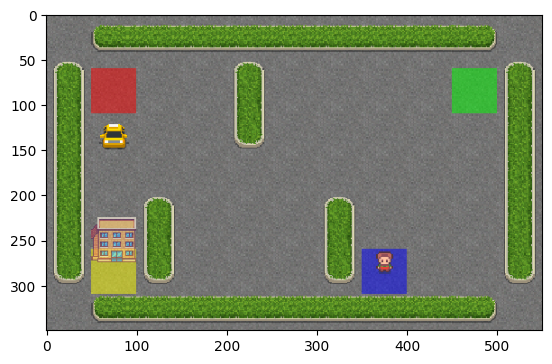

In [ ]:
env.reset()
img = env.render()

plt.imshow(img)
plt.show()

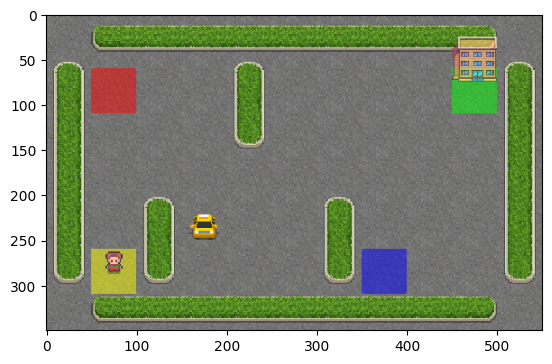

In [ ]:
env.reset()
img = env.render()

plt.imshow(img)
plt.show()

**The Taxi has 6 different actions it can take, and can exist in 500 different states. A Q table of this size is created to be used in the model.**

In [ ]:
n_states=env.observation_space.n
n_actions=env.action_space.n

print(f"Number of states: {n_states}")
print(f"Number of actions: {n_actions}")

Number of states: 500
Number of actions: 6


In [ ]:
qTable =np.zeros([n_states,n_actions])

In [ ]:
qTable

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [ ]:
# Varibles containing information used by the model during training and testing

total_episodes = 50000
total_test_episodes = 100
max_steps = 99

learning_rate = .05
gamma = 0.618

epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.01

**The below code is an implementation of the Q-learning algorithm. The model is trained 50,000 times making improvements to itself given it's score value.**

In [ ]:
for episode in range(total_episodes):
  state = env.reset()[0]
  step = 0
  done = False

  for step in range(max_steps):

    randomNum = random.uniform(0,1)

    if randomNum > epsilon:
      action = np.argmax(qTable[state, :])

    else:
      action = env.action_space.sample()

    new_state, reward, done, disgard, info = env.step(action)
    #print(f"new_state: {new_state}, reward: {reward}, done: {done}, disgard: {disgard}")
    qTable[state, action] = qTable[state, action] + learning_rate * (reward + gamma * np.max(qTable[new_state, :]) - qTable[state, action])


    state = new_state

    if done == True:
        break

  episode += 1


  epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)



**After training, the model is tested**

****

############### FINAL TEST ##############
Episode : 0
********************************************


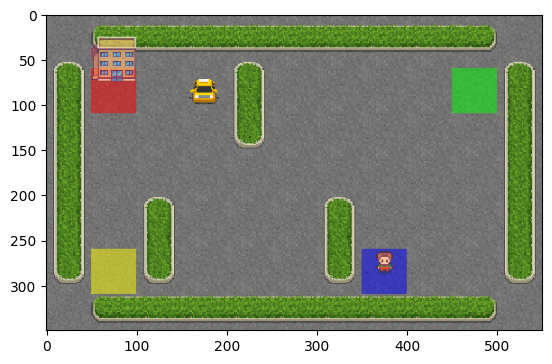

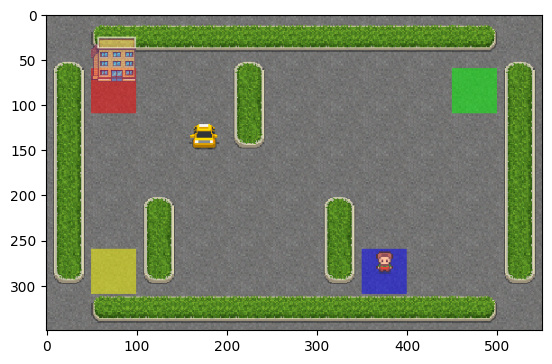

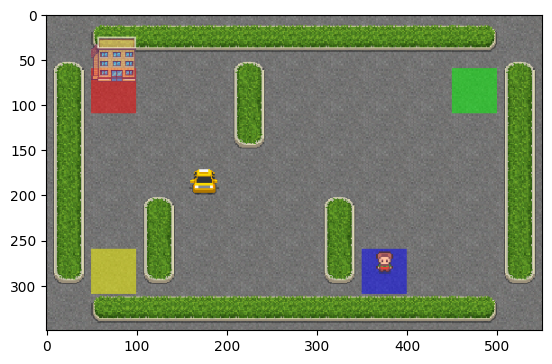

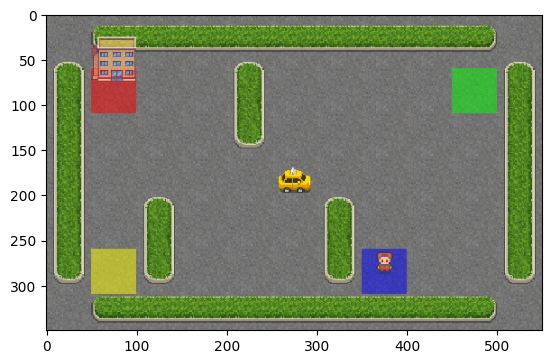

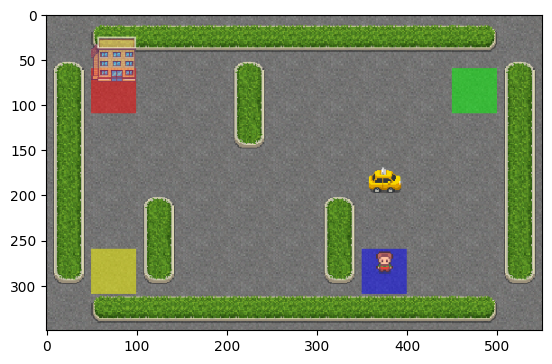

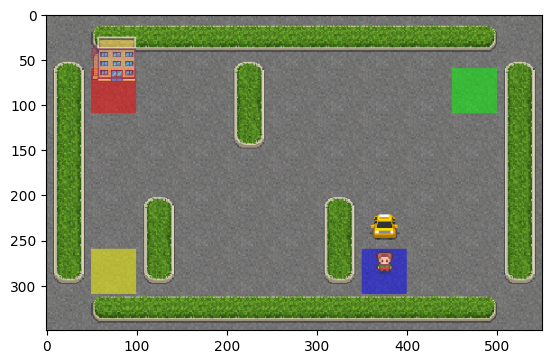

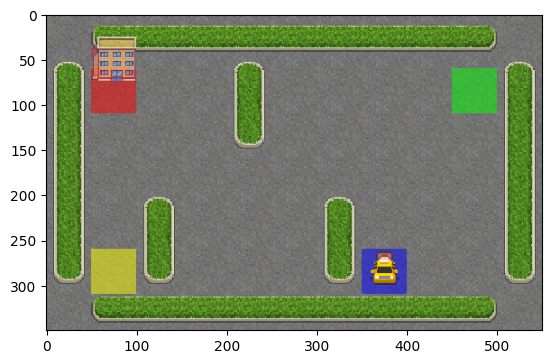

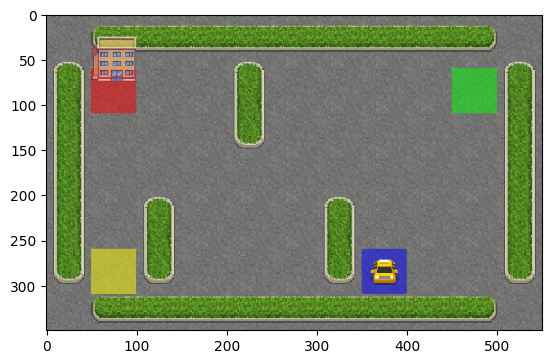

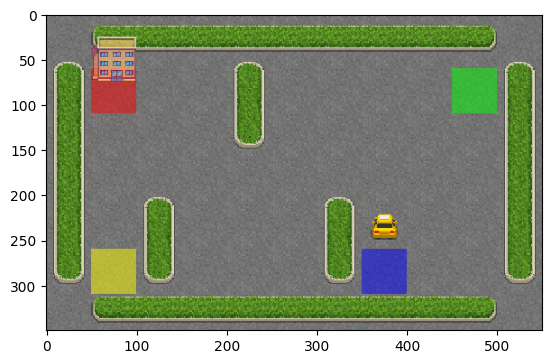

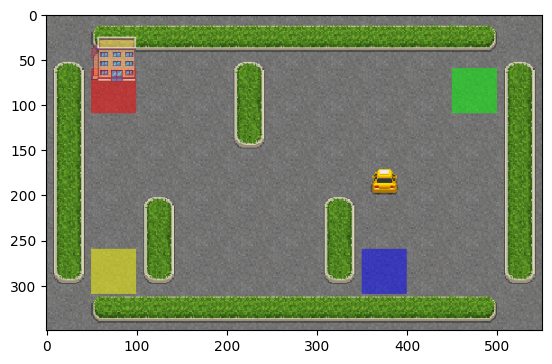

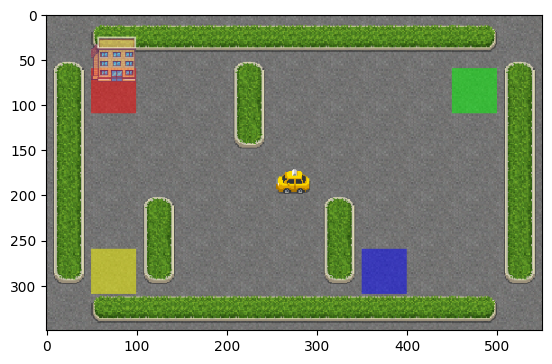

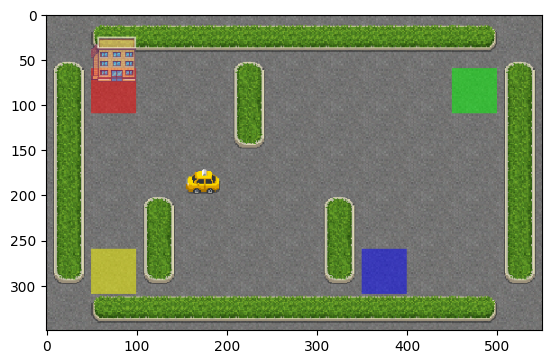

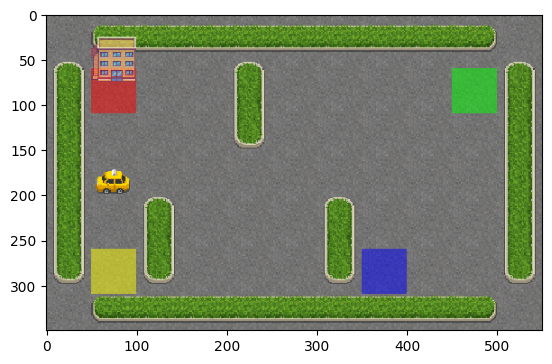

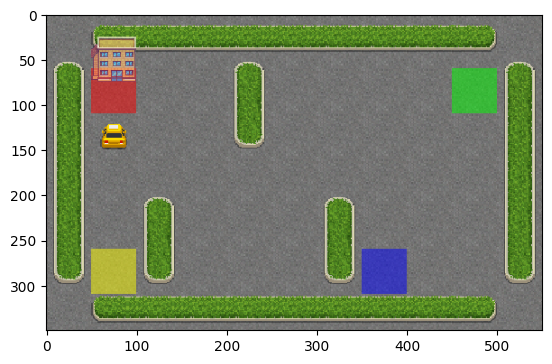

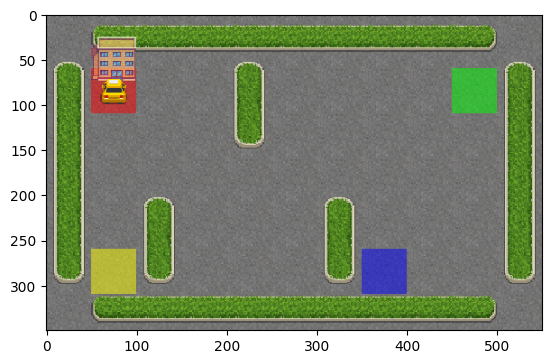

Score: 6
Episode : 1
********************************************
Score: 9
Episode : 2
********************************************
Score: 9
Episode : 3
********************************************
Score: 12
Episode : 4
********************************************
Score: 5
Episode : 5
********************************************
Score: 10
Episode : 6
********************************************
Score: 11
Episode : 7
********************************************
Score: 4
Episode : 8
********************************************
Score: 6
Episode : 9
********************************************
Score: 7
Episode : 10
********************************************
Score: 12
Episode : 11
********************************************
Score: 7
Episode : 12
********************************************
Score: 5
Episode : 13
********************************************
Score: 10
Episode : 14
********************************************
Score: 12
Episode : 15
*******************************************

In [ ]:
env.reset()
rewards = []

print('############### FINAL TEST ##############')
for episode in range(total_test_episodes): #total_test_episodes):
  state = env.reset()[0]
  step = 0
  done = False
  total_rewards = 0

  print(f"Episode : {episode}")
  print('********************************************')
  for step in range(max_steps):

    if episode == 0:
      img = env.render()
      plt.imshow(img)
      plt.show()

    action = np.argmax(qTable[state, :])

    new_state, reward, done, disgard, info, = env.step(action)

    total_rewards += reward

    if done:
      rewards.append(total_rewards)
      print(f"Score: {total_rewards}")
      break

    state = new_state
env.close()

print("\n########################################################\n")
print ("Average Score: ", str(sum(rewards)/total_test_episodes))


**Not bad! I will continue to work on this and hopefully get even better results in the future.**